# Section 2. Exploratory Data Analysis 

In this section, we will mainly talk about performing exploratory data analysis(EDA) on a data set. Given a fixed data set, there can be inifite ways on how we explore and visualize it. At that point, it is up to you, the data scientist, to decide which visual coneys the most information and makes the most sense to the audiences. 

**Hint**: always keep in mind about the initial hypothesis that we proposed! Those are the problems that most likely interest our sponsors.


A great resource for all kinds of visulizations can be found here https://edav.info/.

### CONTENTS
* <a href='01- DSC 2022 Problem Definition.ipynb#top'>**Section 1. Problem Definition**</a> 
* <a href='02- DSC 2022 Exploratory Data Analysis.ipynb#top'>**Section 2. Exploratory Data Analysis**</a> 
  * [1. Univariate analysis](#uni)
  * [2. Covariate analysis](#co)
* <a href='03 - DSC 2022 Hypothesis testing.ipynb#top'>**Section 3. Hypothesis Testing**</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmg = pd.read_excel('cmg.xlsx',index_col = 'offeringId')
cmg.head(5)

,offeringPricingDate,offeringType,offeringSector,offeringSubSector,offeringDiscountToLastTrade,offeringPrice,issuerCusip,issuerName,pre15_Price_Normalized,pre14_Price_Normalized,...,pre1_Price_Normalized,underwriters,totalBookrunners,leftLeadFirmId,leftLeadFirmName,post1_Price_Normalized,post7_Price_Normalized,post30_Price_Normalized,post90_Price_Normalized,post180_Price_Normalized
offeringId,,,,,,,,,,,,,,,,,,,,,
b969a1c8-0a26-438a-81e6-5e95f3b30501,2003-10-02,IPO,Consumer Cyclical,Vehicles & Parts,0.0,13.0,501889208,BharCap Acquisition Corp.,NaN,NaN,...,NaN,[{'firmId': '15af8b8d-c949-4fa0-b35e-a6482d3ca...,2,759ce574-3755-480b-8b83-c614f4568db1,Baird,-0.855769,-0.850000,-0.831635,-0.825481,-0.836538
1081394b-c9f2-4479-8dd2-528027ff1eea,2005-07-21,IPO,Communication Services,Telecom Services,0.0,13.0,209034107,GrandSouth Bancorporation,NaN,NaN,...,NaN,[{'firmId': 'dac135c0-9e99-4362-9762-7179a0023...,2,5eb63e75-8f95-464e-86fe-3222865c54ef,Credit Suisse,0.060769,0.136923,0.041538,-0.018462,-0.016923
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0,2005-08-04,IPO,Communication Services,Internet Content & Information,0.0,27.0,056752108,Brand Velocity Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,dac135c0-9e99-4362-9762-7179a0023c9e,Goldman Sachs & Co.,-0.546148,-0.637407,-0.711852,-0.746296,-0.798111
43f06950-8d20-4cfc-b16d-237e0927e1e6,2005-11-10,IPO,Industrials,Consulting Services,0.0,16.0,G47567105,ProLung Inc.,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,cd9cd378-73b5-4cef-8666-ad2c5149ccd8,Goldman Sachs & Co.,-0.699502,-0.697394,-0.682808,-0.566124,-0.512702
96a13598-121a-41c0-83b5-448843cd8709,2006-02-03,IPO,Energy,Oil & Gas Midstream,0.0,21.0,29273V100,Golden Star Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': '7d932034-3e85-46ab-97b4-b6e8e86ee...,3,8fdb6c2d-3b35-40d4-a886-0a3461b42d98,UBS Investment Bank,-0.730357,-0.738690,-0.740595,-0.703571,-0.688095


<a id='uni'></a>
## 1. Univariate analysis 
For univariate analysis, things we could look for are but definitely not limited to missing data, distribution(center, dispersion, outliers). With this data set, you do not have to worry about the missing data since we have already filtered out for you. 

a. Categorical variables
- [Pie chart](#pie)
- [Barplot](#bar)

b. Continuous variables
- [Histogram](#hist)
- [Boxplot](#box)

<a id='pie'></a>
### Pie chart

In [3]:
type_counts = cmg['offeringType'].value_counts()
type_counts

IPO                   2839
MARKETED_FO           2237
OVERNIGHT_FO          1658
REGISTERED_BLOCK      1246
UNREGISTERED_BLOCK     509
Name: offeringType, dtype: int64

Text(0.5, 1.0, 'Pie chart for offering types')

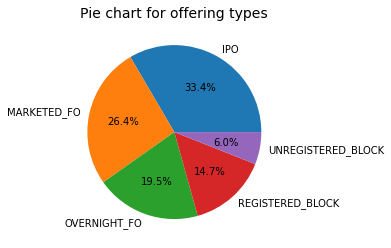

In [4]:
plt.figure(figsize = (10,4))
plt.pie(x=type_counts, autopct="%.1f%%",  labels = type_counts.index)
plt.title("Pie chart for offering types", fontsize=14)

<a id='bar'></a>
### Barplot

Text(0.5, 1.0, 'Bar chart for offering types')

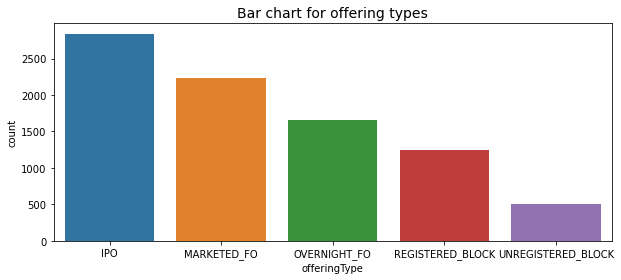

In [5]:
plt.figure(figsize = (10,4))
sns.countplot(data=cmg, x = 'offeringType', order=type_counts.index)
plt.title('Bar chart for offering types', fontsize = 14)

Even with bar charts, we can make it vertical!

Number of sectors  11
Number of sub-sectors  81


Text(0.5, 1.0, 'Bar charts for offering sectors')

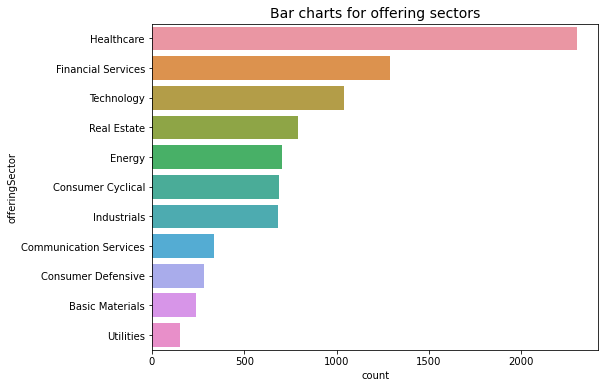

In [6]:
print('Number of sectors ', len(cmg['offeringSector'].unique()))
print('Number of sub-sectors ', len(cmg['offeringSubSector'].unique()))
plt.figure(figsize = (8, 6))
sns.countplot(data=cmg, y = 'offeringSector', order=cmg.offeringSector.value_counts().index)
plt.title('Bar charts for offering sectors', fontsize = 14)

<a id='hist'></a>
### Histogram

Text(0.5, 1.0, 'Histogram of number of bookrunners')

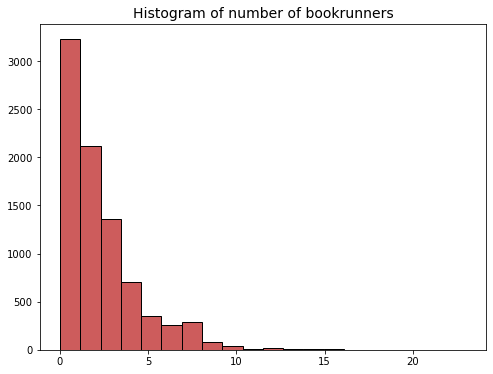

In [7]:
plt.figure(figsize =(8, 6))
plt.hist(cmg['totalBookrunners'], bins = 20, edgecolor='black', color = "indianred")
plt.title('Histogram of number of bookrunners', fontsize = 14)

<a id='box'></a>
### Boxplot

Another useful plot for visulizing distribution of continuous variables is the boxplot. For example, the boxplot below shows the distributions of our outcomes. 

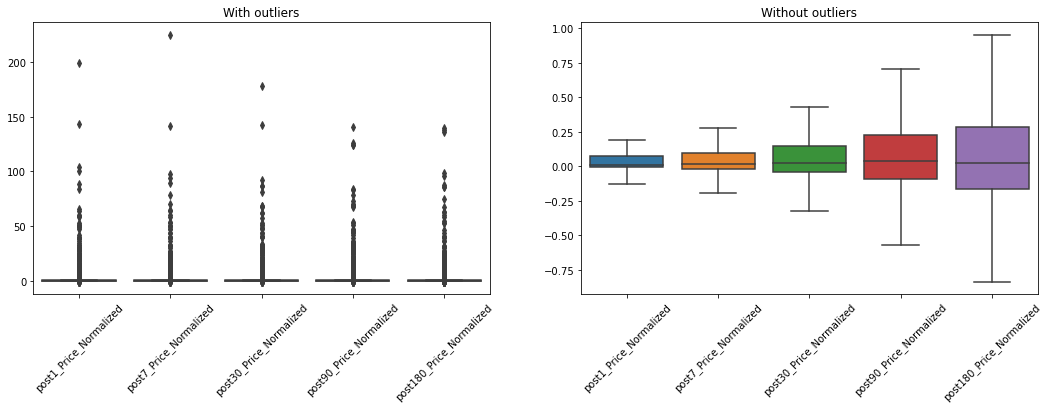

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 5))
sns.boxplot(data = cmg.filter(regex = 'post'), ax = ax1)
ax1.set_title('With outliers')
ax1.tick_params('x', labelrotation=45)
sns.boxplot(data = cmg.filter(regex = 'post'), showfliers = False, ax = ax2)
ax2.set_title('Without outliers')
ax2.tick_params('x', labelrotation=45)

<a id='co'></a>
## 2. Covariate analysis

*a. Categorical vs Categorical*
- [Grouped bar chart](#groupedbar)
- [Heatmap](#heatmap)

*b. Categorical vs Continuous*
- [Grouped boxplot](#groupedbox)
- [Grouped line plot](#groupedline)

*c. Continous vs Continuous*
- [Scatterplot](#scatterplot)
- [Correlogram](#correlogram)

<a id='groupedbar'></a>
### Grouped bar chart 

In [9]:
LeadFirm_counts = cmg.leftLeadFirmName.value_counts()
top5_lead_firm = LeadFirm_counts.iloc[:5].index
print(top5_lead_firm)

Index(['Morgan Stanley', 'Goldman Sachs & Co.', 'J.P. Morgan',
       'BofA Securities', 'Citigroup'],
      dtype='object')


Text(0.5, 1.0, 'Bar chart of sectors of top5 lead firms(frequency)')

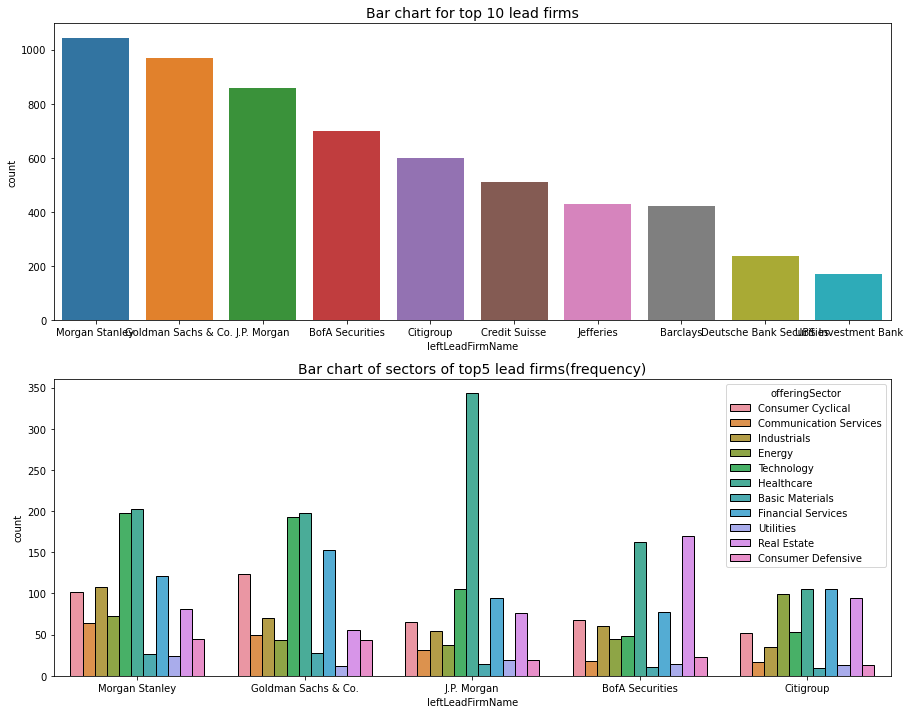

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 12), gridspec_kw={'height_ratios': [1, 1]}) # one row, two columns 
cmg['totalBookrunners'].value_counts()

sns.countplot(data=cmg, x = 'leftLeadFirmName', order=LeadFirm_counts.iloc[:10].index, ax = ax1)
ax1.set_title('Bar chart for top 10 lead firms', fontsize = 14)

sns.countplot(data=cmg, x = 'leftLeadFirmName', hue='offeringSector', edgecolor = 'black', order= top5_lead_firm, ax = ax2)
ax2.set_title('Bar chart of sectors of top5 lead firms(frequency)', fontsize = 14)

<a id='heatmap'></a>
### Heatmap


The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. 

The distribution of invested sectors between Morgan Stanley and Goldman Sachs are quite similar. JP Morgan invests in Healthcare than any other firm. BofA invests a lot in Real Estate, while Citigroup focuses on Energy.

Text(0.5, 1.0, 'Heatmap of sectors of top5 lead firms(percentage)')

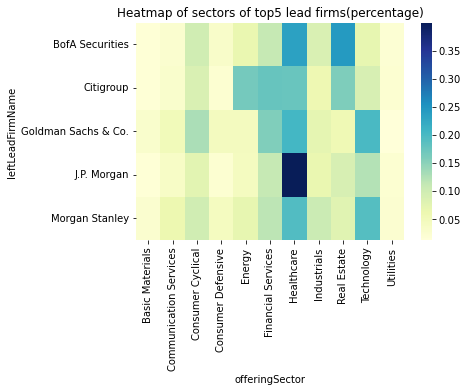

In [11]:
LeadFirm_Sector = cmg[cmg['leftLeadFirmName'].isin(top5_lead_firm)]\
    .groupby(['leftLeadFirmName', 'offeringSector']).size()\
    .reset_index()\
    .rename(columns = {0:'count'})

LeadFirm_Sector['percentage'] = LeadFirm_Sector['count']/LeadFirm_Sector.groupby('leftLeadFirmName')['count'].transform('sum')
LeadFirm_Sector = LeadFirm_Sector.pivot(index = 'leftLeadFirmName', columns = 'offeringSector', values = 'percentage')
sns.heatmap(LeadFirm_Sector, cmap = "YlGnBu")
plt.title('Heatmap of sectors of top5 lead firms(percentage)')

<a id='groupedbox'></a>
### Grouped boxplot

<AxesSubplot:xlabel='offeringPrice', ylabel='offeringSector'>

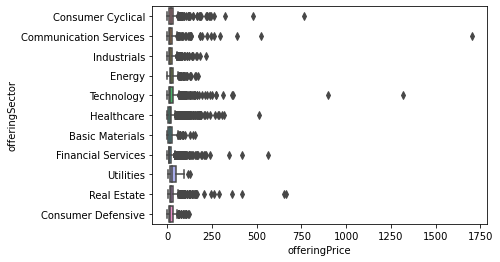

In [12]:
sns.boxplot(y = 'offeringSector', x = 'offeringPrice', data = cmg)

<a id='groupedline'></a>
### Grouped line plot

<AxesSubplot:>

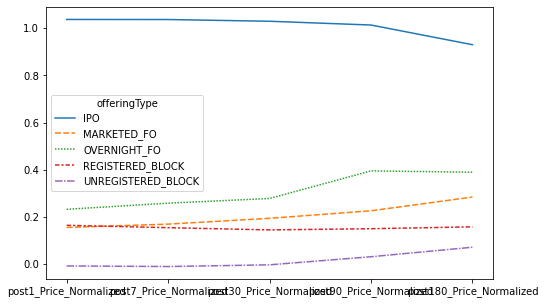

In [14]:
plt.figure(figsize = (8, 5))
type_avg = cmg.groupby('offeringType')[list(cmg.filter(like = 'post'))].mean()
sns.lineplot(data = type_avg.T)

<a id='scatterplot'></a>
### Scatterplot 

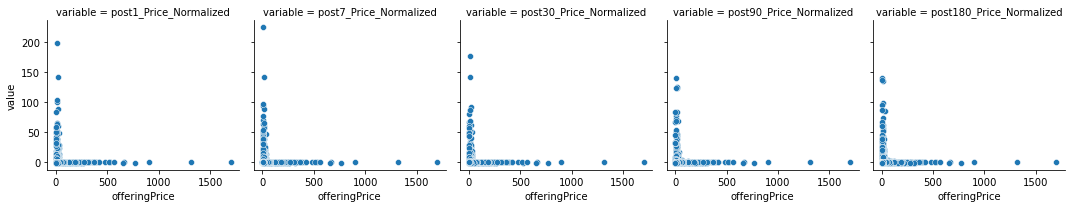

In [15]:
temp = pd.concat([cmg[['offeringPrice']], cmg.filter(like = 'post')], axis = 1)\
    .melt(id_vars=['offeringPrice'], value_vars=list(cmg.filter(like = 'post')))

g = sns.FacetGrid(temp, col="variable")
g.map_dataframe(sns.scatterplot, x="offeringPrice", y="value")
g.add_legend()

In [16]:
colors = ['PowderBlue', 'orange', 'green', 'red', 'purple']
type_dict = dict(zip(list(pd.unique(cmg.offeringType)), colors))

colors = ['Blue', 'orange', 'green', 'red', 'purple', 'IndianRed', 'pink', 'gray', 'olive', 'cyan', 'lavender']
sector_dict = dict(zip(list(pd.unique(cmg.offeringSector)), colors))

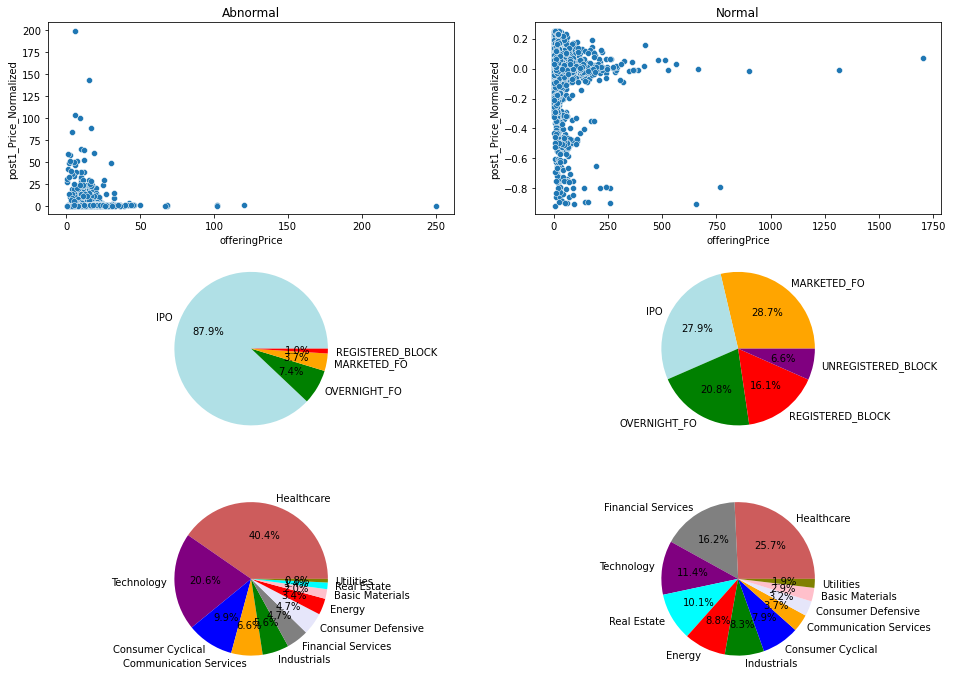

In [17]:
cmg['abnormal']  = cmg['post1_Price_Normalized'] > 0.25
sum(cmg['abnormal'])/cmg.shape[0]
fig, ax = plt.subplots(3,2, figsize = (16, 12))
sns.scatterplot(x = cmg[cmg.abnormal].offeringPrice, 
                y = cmg[cmg.abnormal]['post1_Price_Normalized'], ax = ax[0, 0])
ax[0, 0].set_title('Abnormal')
sns.scatterplot(x = cmg[cmg.abnormal == False].offeringPrice, 
                y = cmg[cmg.abnormal == False]['post1_Price_Normalized'], ax = ax[0, 1] )
ax[0, 1].set_title('Normal')
ax[1, 0].pie(x = cmg[cmg.abnormal].offeringType.value_counts(), autopct="%.1f%%",
        labels = cmg[cmg.abnormal].offeringType.value_counts().index, 
        colors = list(map(type_dict.get, list(cmg[cmg.abnormal].offeringType.value_counts().index))))
ax[1, 1].pie(x = cmg[cmg.abnormal == False].offeringType.value_counts(), autopct="%.1f%%",
        labels = cmg[cmg.abnormal == False].offeringType.value_counts().index, 
        colors = list(map(type_dict.get, list(cmg[cmg.abnormal == False].offeringType.value_counts().index))))

ax[2, 0].pie(x = cmg[cmg.abnormal].offeringSector.value_counts(), autopct="%.1f%%",
        labels = cmg[cmg.abnormal].offeringSector.value_counts().index, 
        colors = list(map(sector_dict.get, list(cmg[cmg.abnormal].offeringSector.value_counts().index))))
ax[2, 1].pie(x = cmg[cmg.abnormal == False].offeringSector.value_counts(), autopct="%.1f%%",
        labels = cmg[cmg.abnormal == False].offeringSector.value_counts().index, 
        colors = list(map(sector_dict.get, list(cmg[cmg.abnormal == False].offeringSector.value_counts().index))))
plt.show()

<a id='correlogram'></a>
### Correlogram

<AxesSubplot:>

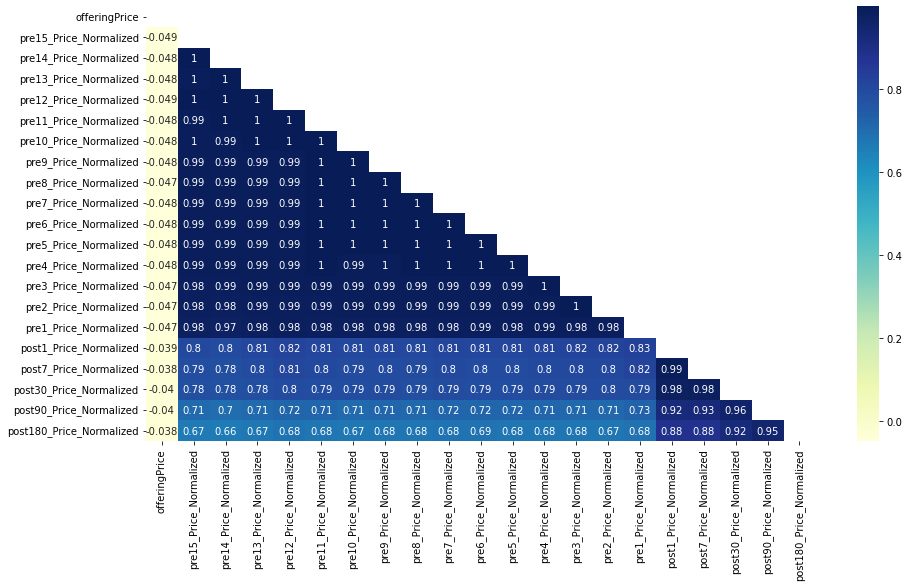

In [18]:
plt.figure(figsize = (15,8))
corr = cmg.filter(like="Price").corr()
matrix = np.triu(corr)
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask = matrix)